<a href="https://www.kaggle.com/code/domainescully/chess-board-lab-11?scriptVersionId=116044630" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
class Board:
    def __init__(self):
        self.grid = np.zeros((8,8,3))
        self.grid[1::2, ::2] = 1
        self.grid[::2, 1::2] = 1
        self.blue_row = None
        self.blue_cloumn = None
        self.red_row = None
        self.red_column = None
        
    def add_red(self, row, col):
        self.red_row = row
        self.red_column = col
        self.grid[row][col] = (1,0,0)
        
    def add_blue(self, row, col):
        self.blue_row = row
        self.blue_column = col
        self.grid[row][col] = (0,0,1)
        
    def render(self):
        plt.imshow(self.grid)
        
    def is_under_attack(self):
        if self.blue_row == self.red_row or self.blue_column == self.red_column:
            return True
        
        if abs(self.red_column - self.blue_column) == abs(self.red_row - self.blue_row):
            return True
        
        return False

False


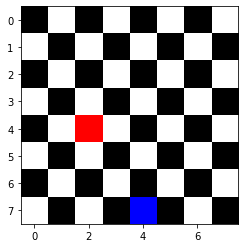

In [3]:
board1 = Board()
board1.add_red(4,2)
board1.add_blue(7,4)
board1.render()
print(board1.is_under_attack())

In [4]:
# queens on same row should be "under attack"
board1.add_red(6,2)
board1.add_blue(6,4)
assert board1.is_under_attack()
print('******** UNDER ATTACK ********')

******** UNDER ATTACK ********


In [5]:
# queens on same column should be "under attack"
board1.add_red(1,4)
board1.add_blue(6,4)
assert board1.is_under_attack()
print('******** UNDER ATTACK ********')

******** UNDER ATTACK ********


In [6]:
# queens on same diagonal should be "under attack"
board1.add_red(1,4)
board1.add_blue(4,1)
assert board1.is_under_attack()
print('******** UNDER ATTACK ********')

******** UNDER ATTACK ********


In [7]:
# queens with any other coordinates should NOT be "under attack"
board1.add_red(2,5)
board1.add_blue(3,7)
assert not board1.is_under_attack()
print('******** NOT UNDER ATTACK ********')

******** NOT UNDER ATTACK ********
